# Data Acquisition and Exploration

This is a pivot from the earlier version of the project which explored the full text corpora of the books. Training with the large sets proved too lengthy for my purposes, so I have parred the material down to book summaries.

Data initially acquired from Jasminyas' __[CMU Book Summary Dataset](https://www.kaggle.com/datasets/ymaricar/cmu-book-summary-dataset)__ on Kaggle.

## Project Description

In this project I will attempt to create a machine learning model which can use a book summary to predict the best genre(s) for a book. I will ingest and train the model on book existing book summaries labeled with their appropriate genres and will split the dataset for training and testing.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import json

In [5]:
path_to_data = "../Data/booksummaries.txt"
col_names = [
    "wikipedia_article_id",
    "freebase_id",
    "book_title",
    "author",
    "publication_date",
    "book_genres",
    "plot_summary"
]
df = pd.read_csv(path_to_data, sep="\t", names=col_names)

In [6]:
df.head()

,wikipedia_article_id,freebase_id,book_title,author,publication_date,book_genres,plot_summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   wikipedia_article_id  16559 non-null  int64 
 1   freebase_id           16559 non-null  object
 2   book_title            16559 non-null  object
 3   author                14177 non-null  object
 4   publication_date      10949 non-null  object
 5   book_genres           12841 non-null  object
 6   plot_summary          16559 non-null  object
dtypes: int64(1), object(6)
memory usage: 905.7+ KB


### Initial Observations

There are 16559 rows in this dataset, though only 12841 have our target variable of book_genres. All columns other than plot_summary (our variable) and book_genres (our target) are unnecessary for this analysis.

book_genres is formatted in a dictionary of freebase_id: genre_name tuples for each book. For example, Animal Farm has the genres {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}. Let's drill more into the genres.

In [8]:
# look at an example as-is
tmp = df.book_genres[0]
print(tmp)
type(tmp)

{"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}


str

In [9]:
# convert an entry to a dictonary
test = json.loads(tmp)
print(test)
type(test)

{'/m/016lj8': 'Roman à clef', '/m/06nbt': 'Satire', '/m/0dwly': "Children's literature", '/m/014dfn': 'Speculative fiction', '/m/02xlf': 'Fiction'}


dict

In [10]:
# process through the dictionary
for k, v in test.items(): print(k, v)

/m/016lj8 Roman à clef
/m/06nbt Satire
/m/0dwly Children's literature
/m/014dfn Speculative fiction
/m/02xlf Fiction


In [11]:
list(test.values())

['Roman à clef',
 'Satire',
 "Children's literature",
 'Speculative fiction',
 'Fiction']

In [12]:
# rearrange genre dicts into lists of names only
def genre_dict_to_list(dict_string):
    genre_dict = json.loads(dict_string)
    return list(genre_dict.values())
genre_dict_to_list(tmp)

['Roman à clef',
 'Satire',
 "Children's literature",
 'Speculative fiction',
 'Fiction']

In [13]:
# let's see a breakdown of genres in this set
df_genres = df[['plot_summary','book_genres']].copy()
df_genres.dropna(axis=0, subset=['book_genres'], inplace=True)
df_genres.head()

,plot_summary,book_genres
0,"Old Major, the old boar on the Manor Farm, ca...","{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":..."
1,"Alex, a teenager living in near-future Englan...","{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N..."
2,The text of The Plague is divided into five p...,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi..."
4,The novel posits that space around the Milky ...,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90..."
5,"The book tells the story of Paul Bäumer, a Ge...","{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman..."


In [14]:
df_genres['book_genres'] = df_genres['book_genres'].apply(genre_dict_to_list)
df_genres.head()

,plot_summary,book_genres
0,"Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ..."
1,"Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction..."
2,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N..."
4,The novel posits that space around the Milky ...,"[Hard science fiction, Science Fiction, Specul..."
5,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman à clef]"


In [15]:
df_exploded = df_genres.explode(column='book_genres')
df_exploded

,plot_summary,book_genres
0,"Old Major, the old boar on the Manor Farm, ca...",Roman à clef
0,"Old Major, the old boar on the Manor Farm, ca...",Satire
0,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
0,"Old Major, the old boar on the Manor Farm, ca...",Speculative fiction
0,"Old Major, the old boar on the Manor Farm, ca...",Fiction
...,...,...
16555,The reader first meets Rapp while he is doing...,Thriller
16555,The reader first meets Rapp while he is doing...,Fiction
16556,The book follows very rough chronological ord...,Autobiography
16558,Makar Devushkin and Varvara Dobroselova are s...,Epistolary novel


<AxesSubplot:xlabel='book_genres', ylabel='Count'>

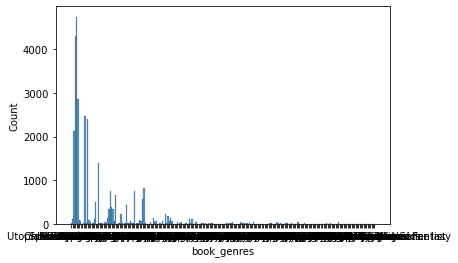

In [16]:
sns.histplot(data=df_exploded, x='book_genres')

As expected, there is a lot of noise in the genres, with several well-represented categories and many more with minimal representation. Let's pare the set down to only those with a sginificant amount of entries.

In [17]:
genre_counts = df_exploded.groupby('book_genres')\
            .size()\
            .reset_index(name='count')\
            .sort_values(['count'], ascending=False)
genre_counts

,book_genres,count
75,Fiction,4747
192,Speculative fiction,4314
176,Science Fiction,2870
136,Novel,2463
71,Fantasy,2413
...,...,...
70,Fantastique,1
41,Conspiracy,1
67,Fable,1
40,Computer Science,1


In [18]:
genre_counts[genre_counts['count'] < 20]

,book_genres,count
92,Historical fantasy,18
222,Wuxia,18
145,Picaresque novel,18
138,Parallel novel,17
87,Graphic novel,17
...,...,...
70,Fantastique,1
41,Conspiracy,1
67,Fable,1
40,Computer Science,1


In [19]:
genre_counts[genre_counts['count'] >= 20]

,book_genres,count
75,Fiction,4747
192,Speculative fiction,4314
176,Science Fiction,2870
136,Novel,2463
71,Fantasy,2413
...,...,...
175,Science,22
212,True crime,22
163,Psychology,21
209,Travel,21


In [20]:
genre_counts.iloc[0:20]

,book_genres,count
75,Fiction,4747
192,Speculative fiction,4314
176,Science Fiction,2870
136,Novel,2463
71,Fantasy,2413
28,Children's literature,2122
128,Mystery,1396
223,Young adult literature,825
200,Suspense,765
47,Crime Fiction,753


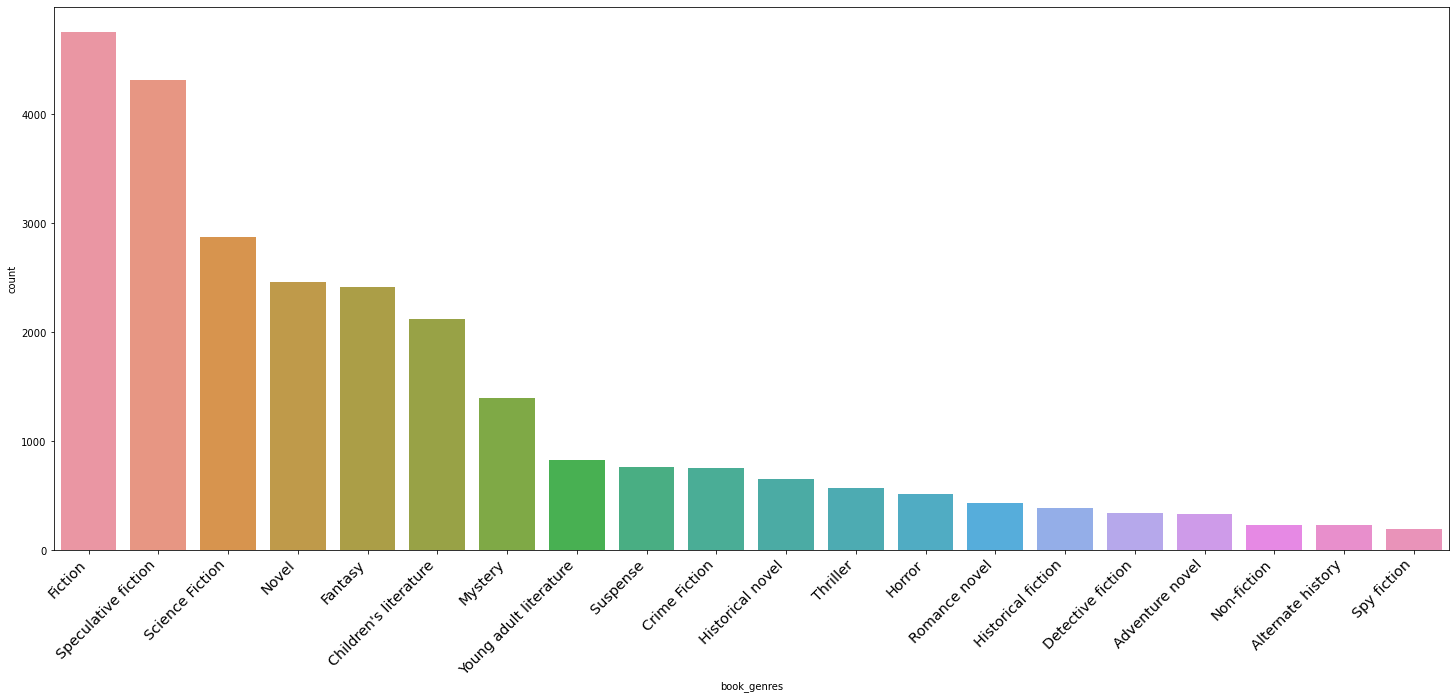

In [21]:
plt.figure(figsize=(25,10))
chart = sns.barplot(data=genre_counts.iloc[0:20], x='book_genres', y='count')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
    
);

In [22]:
top_20_genres = list(genre_counts.iloc[0:20].book_genres)

In [23]:
top_20_genres

['Fiction',
 'Speculative fiction',
 'Science Fiction',
 'Novel',
 'Fantasy',
 "Children's literature",
 'Mystery',
 'Young adult literature',
 'Suspense',
 'Crime Fiction',
 'Historical novel',
 'Thriller',
 'Horror',
 'Romance novel',
 'Historical fiction',
 'Detective fiction',
 'Adventure novel',
 'Non-fiction',
 'Alternate history',
 'Spy fiction']

In [24]:
# Let's limit our list of genres to those in the top 20
df_top_20 = df_exploded[df_exploded['book_genres'].isin(top_20_genres)]

In [25]:
df_top_20['plot_summary'].nunique()

12032

In [26]:
df_top_20.reset_index(drop=True, inplace=True)

Okay, we now have a dataframe with summaries for each genre in the top 20 in count from our dataset. We can pass this along to the next stage of cleaning and preparation.

In [28]:
path_to_save = "../Data/top_20_genres_and_summaries.csv"
df_top_20.to_csv(path_to_save)